# **South Korea COVID-19 Data Analysis**
<hr>

# **1. Introduction**
<hr> 

## **1. 1. Project Description**
<hr>

**Goal**

The goal of this project is to analyze the COVID-19 patient-level data of South Korea and prepare homeland for the next wave of the pandemic. The aim of the analysis is to get the most critical insights and use them for creating a plan of fighting the next wave of the pandemics.

> This project is a part of Data Science course at Turing College for the 1st module 4th sprint "Capstone project". Objective for this part is to perform EDA, practice working with data using Pandas, and practice visualising data with Matplotlib & Seaborn.

**Components of the analysis**
- Overview of COVID-19 patients information in South Korea
- Analysis of COVID-19 cases of age and sex subgroups of South Korean population
- Spread of COVID-19 infection in the provinces of South Korea
- Overview of the main group infections in South Korea
- Accumulation of COVID-19 cases in time
- Relationship between COVID-19 incidence and other factors in South Korean regions
- Relationship between COVID-19 incidence and floating population in Seoul province
- Relationship between the spread of COVID-19 infection and weather conditions
- Overview of COVID-19 Infection Control Strategy in South Korea

## **1. 2. Data description**
<hr>

This data analysis uses 2020 COVID-19 data from South Korea. The data was structured based on the Korea Centers for Disease Control & Prevention (KCDC) report materials. The data files were downloaded from [Kaggle](https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset). The data covers the period from January 19, 2020, to June 28, 2020, which is the initial outbreak of COVID-19 in South Korea. There are 11 datasets in the data that cover various aspects of the COVID-19 situation in South Korea. These datasets will be utilised in subsequent analysis:

1) **Case Data:**
    - `Case`: Data of COVID-19 infection cases in South Korea
2) **Patient Data:**
    - `PatientInfo`: Epidemiological data of COVID-19 patients in South Korea
3) **Time Series Data:**
    - `Time`: Time series data of COVID-19 status in South Korea
    - `TimeAge`: Time series data of COVID-19 status in terms of the age in South Korea
    - `TimeGender`: Time series data of COVID-19 status in terms of gender in South Korea
    - `TimeProvince`: Time series data of COVID-19 status in terms of the Province in South Korea
4) **Additional Data:**
    - `Region`: Location and statistical data of the regions in South Korea
    - `SeoulFloating`: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)
    - `Weather`: Data of the weather in the regions of South Korea (from Korea Meteorological Administration)
    - `Policy`: Data of the government policy for COVID-19 in South Korea

# **2. Aquiring and Loading the Data**
<hr>

## **2. 1. Importing Libraries and Notebook setup**
<hr>

In [1]:
import os
import json
from urllib.request import urlopen

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import plotly.express as px

## **2. 2. Uploading the Data**
<hr>

In [2]:
dir_path = 'C:\\Users\\deshrius\\Desktop\\TC\\1_Module\\4S_Capstone_Project_COVID\\datasets\\'
for dirname, _, filenames in os.walk(dir_path):
    for f in filenames:
        print(os.path.join(dirname, f))

C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\Case.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\PatientInfo.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\Policy.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\Region.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\SearchTrend.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\SeoulFloating.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\Time.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\TimeAge.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\TimeGender.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\TimeProvince.csv
C:\Users\deshrius\Desktop\TC\1_Module\4S_Capstone_Project_COVID\datasets\Weather.csv


In [3]:
# GeoJSON data for geospatial data visualiaztion
with urlopen(
    'https://raw.githubusercontent.com/southkorea/southkorea-maps/master/'
    'kostat/2012/json/provinces-geo-simple.json'
) as response:
    province_geo = json.load(response)

# Patient data
p_info = pd.read_csv(dir_path+'PatientInfo.csv')

# Case data
case = pd.read_csv(dir_path+'Case.csv')

# Time series data
time = pd.read_csv(dir_path+'Time.csv')
t_age = pd.read_csv(dir_path+'TimeAge.csv')
t_gender = pd.read_csv(dir_path+'TimeGender.csv')
t_province = pd.read_csv(dir_path+'TimeProvince.csv')

# Additional data
region = pd.read_csv(dir_path+'Region.csv')
weather = pd.read_csv(dir_path+'Weather.csv')
search = pd.read_csv(dir_path+'SearchTrend.csv')
floating = pd.read_csv(dir_path+'SeoulFloating.csv')
policy = pd.read_csv(dir_path+'Policy.csv')

datasets = [
     case, p_info, time, t_age, t_gender, t_province,
     region, weather, search, floating, policy
]

# **3. Data Overview and Cleaning**
<hr>

## **3. 1. Patient Data**
<hr>

In [4]:
p_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


### **3. 1. 1. Checking and Changing Data Types**

In [5]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.1+ KB


In [6]:
date_columns = ['symptom_onset_date', 'confirmed_date',
                'released_date', 'deceased_date']

p_info[date_columns] = p_info[date_columns].replace(' ', np.nan)

# Converting date columns to datetime
p_info[date_columns] = p_info[date_columns].apply(pd.to_datetime)

In [7]:
p_info['contact_number'] = (
    p_info['contact_number']
    .replace('-', np.nan)
    .astype('Int64')
)

# p_info['contact_number'] = p_info['contact_number'].astype(float).astype('Int64')

### **3. 1. 2. Checking for Missing Data**

In [8]:
p_info.isnull().mean().round(4).mul(100).sort_values(ascending=False)

deceased_date         98.72
symptom_onset_date    86.66
contact_number        84.76
infected_by           73.94
released_date         69.27
age                   26.72
sex                   21.72
infection_case        17.79
city                   1.82
confirmed_date         0.06
patient_id             0.00
country                0.00
province               0.00
state                  0.00
dtype: float64

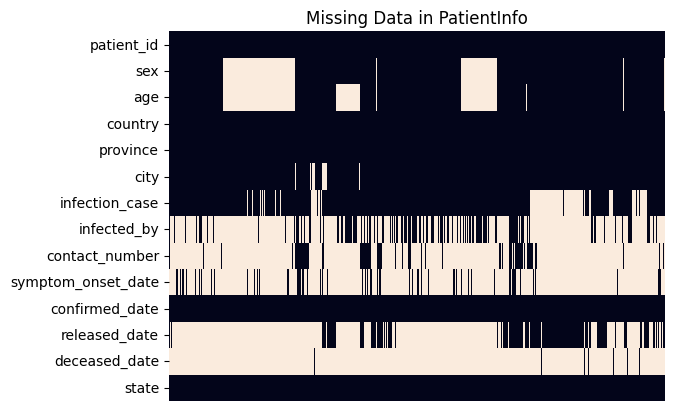

In [9]:
sns.heatmap(p_info.isnull().transpose(), cbar=False)
plt.xticks([])
plt.title("Missing Data in PatientInfo");

There are numerous missing values in the **PatientInfo** dataset. It is not possible to replace missing values with mean or median in this dataframe because the majority of its features represent categorical or datetime data. It does not seem like an appropriate solution to remove rows with NaN values, as doing so would cause a sigificant loss of data. Further analysis is carried out without resolving the missing data, but observations are carefully outlined taking into consideration the quantity of missing values. 

### **3. 1. 3. Cheching for Duplicates**

In [10]:
p_info.duplicated().any()

False

**PatientInfo** data file has no entirely duplicated rows.

In [11]:
dup_id = p_info[p_info['patient_id'].duplicated() == True]['patient_id']

In [12]:
p_info[p_info['patient_id'].isin(dup_id)]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1547,1200012238,female,20s,Korea,Daegu,Icheon-dong,overseas inflow,NaN,<NA>,NaT,2020-06-17,NaT,NaT,isolated
1555,1200012238,female,20s,Korea,Daegu,Nam-gu,overseas inflow,NaN,<NA>,NaT,2020-06-17,NaT,NaT,isolated


In [13]:
p_info = p_info.drop(p_info[p_info['patient_id'] == 1200012238].index)

1200012238 patient is excluded from the dataset as it is not logical that the same person is recorded as confirmed case on the same day in two distant cities.

### **3. 1. 4. Checking for False Values**

In [14]:
p_info['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [15]:
p_info['age'].unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '100s'], dtype=object)

In [16]:
p_info['country'].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [17]:
p_info['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [18]:
p_info['city'].unique()

array(['Gangseo-gu', 'Jungnang-gu', 'Jongno-gu', 'Mapo-gu', 'Seongbuk-gu',
       'etc', 'Songpa-gu', 'Seodaemun-gu', 'Seongdong-gu', 'Seocho-gu',
       'Guro-gu', 'Gangdong-gu', 'Eunpyeong-gu', 'Geumcheon-gu',
       'Gwanak-gu', 'Nowon-gu', 'Dongjak-gu', 'Gangnam-gu',
       'Yangcheon-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Yeongdeungpo-gu',
       'Dobong-gu', 'Yongsan-gu', 'Gangbuk-gu', 'Jung-gu', 'Dongnae-gu',
       'Haeundae-gu', 'Yeonje-gu', nan, 'Buk-gu', 'Nam-gu', 'Seo-gu',
       'Geumjeong-gu', 'Saha-gu', 'Suyeong-gu', 'Sasang-gu',
       'Busanjin-gu', 'Gijang-gun', 'Dong-gu', 'Dalseo-gu',
       'Dalseong-gun', 'Suseong-gu', 'Dalsung-gun', 'Kyeongsan-si',
       'sankyeock-dong', 'Yeongcheon-si', 'Bupyeong-gu', 'Michuhol-gu',
       'Yeonsu-gu', 'Gyeyang-gu', 'Namdong-gu', 'Ganghwa-gun',
       'Yuseong-gu', 'Daedeok-gu', 'Suwon-si', 'Sejong', 'Ulju-gun',
       'Goyang-si', 'Pyeongtaek-si', 'Bucheon-si', 'Guri-si',
       'Siheung-si', 'Gimpo-si', 'Icheon-si', 'Pocheon-s

In [19]:
p_info['city'] = p_info['city'].replace('etc', np.nan)

In [20]:
p_info['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Biblical Language study meeting',
       'Coupang Logistics Center', 'Guri Collective Infection',
       'KB Life Insurance', 'Gangnam Dongin Church',
       'Korea Campus Crusade of Christ',
       'Yeongdeungpo Learning Institute', 'Yeonana News Class',
       'SMR Newly Planted Churches Group', 'Seocho Family',
       'Anyang Gunpo Pastors Group', 'Richway',
       'Samsung Fire & Marine Insurance', 'Yangcheon Table Tennis Club',
       'Yongin Brothers', 'Day Care Center',
       'Geumcheon-gu rice milling machine manufacture', 'Daezayeon Korea',
       'Orange Life', 'Daejeon door-to-door sales',
       'Seoul City Hall Station safety worker', 'Uiwang Logistics Center',
       'Wangsung Church', 'Gangnam Yeoksam-dong gathering',
       'Onchun

In [21]:
p_info['infection_case'] = p_info['infection_case'].replace('etc', np.nan)

In [22]:
p_info['contact_number'].unique()

<IntegerArray>
[        75,         31,         17,          9,          2,         43,
          0,         68,          6,         23,        117,         27,
          8,       <NA>,          4,          3,          1, 1000000796,
         13,         12,       1091,        131,         16,         14,
        485,         19,        296,         15,         34,         37,
         22,          7,         10,         28,         21,          5,
         25,         18,        159,         11,         30,         41,
         71,         38,         24,        185,         69,         39,
       1160,        450,         65,        156,         47,         86,
         74,         46,         64,         66,         40,         20,
         42,        107,         29,         26,         45,         95,
        422,        290,         32,         53,         70,         35,
         51,        130,        106,        174,         78,         33,
         89,         61,        113,

In [23]:
p_info[p_info['contact_number'].isin([6100000098, 1000000796, 6100000099])]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
818,1000000819,NaN,NaN,Korea,Seoul,Eunpyeong-gu,NaN,NaN,1000000796,NaT,2020-05-27,NaT,NaT,released
5109,6100000097,female,60s,Korea,Gyeongsangnam-do,Jinju-si,NaN,NaN,6100000098,2020-03-26,2020-03-31,NaT,NaT,released
5110,6100000098,male,60s,Korea,Gyeongsangnam-do,Jinju-si,NaN,6100000097,6100000099,2020-03-28,2020-03-31,NaT,NaT,released


Values of 6100000098, 1000000796, 6100000099 do not seem logical, therefore these inputs are changed to NaN.

In [24]:
p_info['contact_number'] = (
   p_info['contact_number']
   .replace([6100000098, 1000000796, 6100000099], np.nan) 
)

## **3. 2. Case Data**
<hr>

In [25]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


### **3. 2. 1. Checking and Changing Data Types**

In [26]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [27]:
case = case.rename(columns={' case_id': 'case_id'})

### **3. 2. 2. Checking for Missing Data**

In [28]:
case = case.replace('-', np.nan)

In [29]:
case.isnull().mean().round(4).mul(100).sort_values(ascending=False)

latitude          62.64
longitude         62.64
city              30.46
case_id            0.00
province           0.00
group              0.00
infection_case     0.00
confirmed          0.00
dtype: float64

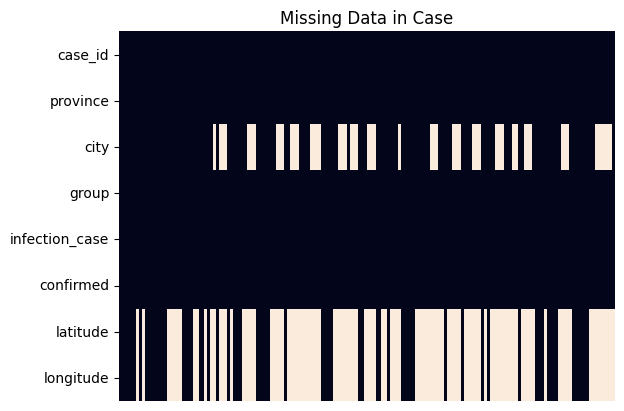

In [30]:
sns.heatmap(case.isnull().transpose(), cbar=False)

plt.title("Missing Data in Case")
plt.xticks([]);

Roughly 60% of the infection cases reported in the **Case** data file have missing coordinates and approximately 30% of the case records do not include a city. It's important to consider the portion of missing data when examining a geospatial **Case** data visualisation and to make sure the trends are consistent with data presented in other files.

> Note: *Because there is a large percentage of missing data, the city and coordinate variables will not be used in the analysis that follows. The variable `province` will be selected as a categorising factor when examining the data by region.*

### **3. 2. 3. Checking for Duplicates**

In [31]:
case.duplicated().any()

False

**Case** data file has no entirely duplicated rows.

In [32]:
case['case_id'].duplicated().any()

False

**Case** file has also no data entries with duplicated `case_id`. 

### **3. 2. 4. Checking for False Values**

In [33]:
case['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [34]:
case['city'].unique()

array(['Yongsan-gu', 'Gwanak-gu', 'Guro-gu', 'Yangcheon-gu', 'Dobong-gu',
       'from other city', 'Dongdaemun-gu', 'Eunpyeong-gu', 'Seongdong-gu',
       'Jongno-gu', 'Gangnam-gu', 'Jung-gu', 'Seodaemun-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Seocho-gu', 'Gangseo-gu', nan,
       'Dongnae-gu', 'Suyeong-gu', 'Haeundae-gu', 'Jin-gu', 'Nam-gu',
       'Dalseong-gun', 'Seo-gu', 'Dong-gu', 'Sejong', 'Seongnam-si',
       'Bucheon-si', 'Uijeongbu-si', 'Anyang-si', 'Suwon-si', 'Wonju-si',
       'Goesan-gun', 'Cheonan-si', 'Seosan-si', 'Muan-gun',
       'Cheongdo-gun', 'Bonghwa-gun', 'Gyeongsan-si', 'Yechun-gun',
       'Chilgok-gun', 'Gumi-si', 'Geochang-gun', 'Jinju-si',
       'Changwon-si', 'Changnyeong-gun', 'Yangsan-si'], dtype=object)

In [35]:
case['city'] = case['city'].replace('from other city', np.nan)

In [36]:
case['group'].unique()

array([ True, False])

In [37]:
case['infection_case'].unique()

array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Manmin Central Church', 'SMR Newly Planted Churches Group',
       'Dongan Church', 'Coupang Logistics Center', 'Wangsung Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Samsung Medical Center',
       'Jung-gu Fashion Company', 'Yeonana News Class',
       'Korea Campus Crusade of Christ', 'Gangnam Yeoksam-dong gathering',
       'Daejeon door-to-door sales',
       'Geumcheon-gu rice milling machine manufacture',
       'Shincheonji Church', 'Guri Collective Infection',
       'KB Life Insurance', 'Yeongdeungpo Learning Institute',
       'Gangnam Dongin Church', 'Biblical Language study meeting',
       'Seocho Family', 'Anyang Gunpo Pastors Group',
       'Samsung Fire & Marine Insurance', 'SJ Investment Call Center',
       'Yongin Brothers', 'Seoul City Hall Station safety worker',
       'Uiwang Logisti

In [38]:
case['infection_case'] = case['infection_case'].replace('etc', 'unknown')

In [39]:
case['confirmed'].unique()

array([ 139,  119,   95,   43,   41,   36,   17,   25,   30,   14,   13,
         10,    7,    5,    6,    1,    8,    3,    4,    0,    2,  298,
        162,  100,   39,   12,   19, 4511,  196,  124,  101,  917,  747,
          9,   23,   53,   42,   20,   68,   11,   55,   15,   16,   31,
         67,   59,   58,   50,   29,   28,   22,  305,   63,   84,  103,
        566,   66,   40,  190,  133,   32,   26], dtype=int64)

## **3. 3. Time Series Data**
<hr>

### **3. 3. 1. Time Data**

In [40]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [41]:
time = time.drop('time', axis=1)

In [42]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   test       163 non-null    int64 
 2   negative   163 non-null    int64 
 3   confirmed  163 non-null    int64 
 4   released   163 non-null    int64 
 5   deceased   163 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.8+ KB


In [43]:
time['date'] = time['date'].apply(pd.to_datetime)

In [44]:
time.isnull().any()

date         False
test         False
negative     False
confirmed    False
released     False
deceased     False
dtype: bool

In [45]:
time.duplicated().any()

False

In [46]:
time['date'].duplicated().any()

False

### **3. 3. 2. TimeAge Data**

In [47]:
t_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [48]:
t_age = t_age.drop('time', axis=1)

*The `time` column is removed from the analysis because the hour that KCDC published the information daily is not significant. This is further extended to other Time Series data files.*

In [49]:
t_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   age        1089 non-null   object
 2   confirmed  1089 non-null   int64 
 3   deceased   1089 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.2+ KB


In [50]:
t_age['date'] = t_age['date'].apply(pd.to_datetime)

In [51]:
t_age.isnull().any()

date         False
age          False
confirmed    False
deceased     False
dtype: bool

In [52]:
t_age.duplicated().any()

False

### **3. 3. 3. TimeGender Data**

In [53]:
t_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [54]:
t_gender = t_gender.drop('time', axis=1)

In [55]:
t_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       242 non-null    object
 1   sex        242 non-null    object
 2   confirmed  242 non-null    int64 
 3   deceased   242 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.7+ KB


In [56]:
t_gender['date'] = t_gender['date'].apply(pd.to_datetime)

In [57]:
t_gender.isnull().any()

date         False
sex          False
confirmed    False
deceased     False
dtype: bool

In [58]:
t_gender.duplicated().any()

False

### **3. 3. 4. TimeProvince Data**

In [59]:
t_province.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [60]:
t_province = t_province.drop('time', axis=1)

In [61]:
t_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2771 non-null   object
 1   province   2771 non-null   object
 2   confirmed  2771 non-null   int64 
 3   released   2771 non-null   int64 
 4   deceased   2771 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 108.4+ KB


In [62]:
t_province['date'] = t_province['date'].apply(pd.to_datetime)

In [63]:
t_province.isnull().any()

date         False
province     False
confirmed    False
released     False
deceased     False
dtype: bool

In [64]:
t_province.duplicated().any()

False

## **3. 4. Additional Data**
<hr>

### **3. 4. 1. Region data**

In [65]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [66]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [67]:
region.isnull().any()

code                        False
province                    False
city                        False
latitude                    False
longitude                   False
elementary_school_count     False
kindergarten_count          False
university_count            False
academy_ratio               False
elderly_population_ratio    False
elderly_alone_ratio         False
nursing_home_count          False
dtype: bool

In [68]:
region.duplicated().any()

False

In [69]:
region['code'].duplicated().any()

False

In [70]:
region['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Korea'], dtype=object)

In [71]:
region['city'].sort_values().unique()

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Boeun-gun', 'Bonghwa-gun', 'Boryeong-si', 'Boseong-gun',
       'Buan-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu', 'Busan',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Cheongyang-gun', 'Cheorwon-gun', 'Chilgok-gun', 'Chuncheon-si',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Chungju-si',
       'Daedeok-gu', 'Daegu', 'Daejeon', 'Dalseo-gu', 'Dalseong-gun',
       'Damyang-gun', 'Dangjin-si', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongducheon-si', 'Donghae-si', 'Dongjak-gu',
       'Dongnae-gu', 'Eumseong-gun', 'Eunpyeong-gu', 'Gangbuk-gu',
       'Gangdong-gu', 'Ganghwa-gun', 'Gangjin-gun', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Gangwon-do', 'Gapyeong-gun',
       'Geochang-gun', 'Geoje-si', 'Geumcheon-gu', 'Geumjeong-gu',
       'Geumsan-gun', 'Gijang-gun', 'Gimch

### **3. 4. 2. SeoulFloating Data**

In [72]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [73]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [74]:
floating = (
    floating.rename(columns={'birth_year': 'age'})
    .drop(['province'], axis=1)
)

In [75]:
floating.isnull().any()

date      False
hour      False
age       False
sex       False
city      False
fp_num    False
dtype: bool

In [76]:
floating['age'].unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

In [77]:
floating['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [78]:
floating = (
    floating.groupby(['date', 'age', 'sex', 'city'])['fp_num']
    .sum()
    .reset_index()
)

In [79]:
floating['date'] = floating['date'].apply(pd.to_datetime)

In [80]:
floating['age'] = floating['age'].astype(str) + 's'

### **3. 4. 3. Policy Data**

In [81]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   61 non-null     int64 
 1   country     61 non-null     object
 2   type        61 non-null     object
 3   gov_policy  61 non-null     object
 4   detail      59 non-null     object
 5   start_date  61 non-null     object
 6   end_date    24 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [82]:
policy = policy.set_index('policy_id')

In [83]:
policy[['start_date', 'end_date']] = (
    policy[['start_date', 'end_date']]
    .apply(pd.to_datetime)
)

In [84]:
policy.isnull().mean().round(4).mul(100).sort_values(ascending=False)

end_date      60.66
detail         3.28
country        0.00
type           0.00
gov_policy     0.00
start_date     0.00
dtype: float64

In [85]:
policy.duplicated().any()

False

In [86]:
policy['country'].unique()

array(['Korea'], dtype=object)

In [87]:
policy['type'].unique()

array(['Alert', 'Immigration', 'Health', 'Social', 'Education',
       'Technology', 'Administrative', 'Transformation'], dtype=object)

In [88]:
policy['gov_policy'].unique()

array(['Infectious Disease Alert Level', 'Special Immigration Procedure',
       'Mandatory 14-day Self-Quarantine',
       'Mandatory Self-Quarantine & Diagonostic Tests',
       'Emergency Use Authorization of Diagnostic Kit',
       'Drive-Through Screening Center', 'Mask Distribution',
       'Social Distancing Campaign', 'Thanks to Challenge korea',
       'School Closure', 'School Opening Delay',
       'School Opening with Online Class', 'Open Data ', 'Open API',
       'Self-Diagnosis App', 'Self-Quarantine Safety Protection App',
       'Electronic Wristbands', 'Close bars and clubs',
       'local government Administrative orders', 'Close karaoke',
       'Logistics center', 'Wearing of masks',
       'KI-Pass: Korea Internet - Pass',
       'Extends Tightened Quarantine Measures '], dtype=object)

In [89]:
policy = policy.drop('country', axis=1)

### **3. 4. 4. Weather Data**

In [90]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [91]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   26271 non-null  int64  
 1   province               26271 non-null  object 
 2   date                   26271 non-null  object 
 3   avg_temp               26256 non-null  float64
 4   min_temp               26266 non-null  float64
 5   max_temp               26268 non-null  float64
 6   precipitation          26271 non-null  float64
 7   max_wind_speed         26262 non-null  float64
 8   most_wind_direction    26242 non-null  float64
 9   avg_relative_humidity  26251 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


In [92]:
weather['date'] = weather['date'].apply(pd.to_datetime)

In [93]:
weather.isnull().mean().round(4).mul(100).sort_values(ascending=False)

most_wind_direction      0.11
avg_relative_humidity    0.08
avg_temp                 0.06
max_wind_speed           0.03
min_temp                 0.02
max_temp                 0.01
code                     0.00
province                 0.00
date                     0.00
precipitation            0.00
dtype: float64

In [94]:
weather = (
    weather.drop(
        ['code', 'min_temp', 'max_temp', 'most_wind_direction'],
        axis=1
    )
    .dropna()
)

In [95]:
weather.duplicated().any()

False

In [96]:
weather = weather[weather['date'] > '2020-01-20']

In [97]:
weather['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
       'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Chunghceongbuk-do'], dtype=object)

In [98]:
weather

,province,date,avg_temp,precipitation,max_wind_speed,avg_relative_humidity
23695,Seoul,2020-01-21,-0.4,0.0,3.5,36.9
23696,Busan,2020-01-21,5.0,0.0,5.9,47.5
23697,Daegu,2020-01-21,1.9,0.0,4.7,36.0
23698,Gwangju,2020-01-21,3.6,0.0,4.4,38.8
23699,Incheon,2020-01-21,-0.3,0.0,4.3,49.9
...,...,...,...,...,...,...
26266,Jeollabuk-do,2020-06-29,22.0,27.6,4.4,85.1
26267,Jeollanam-do,2020-06-29,21.9,80.5,16.8,97.9
26268,Gyeongsangbuk-do,2020-06-29,20.4,43.9,4.5,90.9
26269,Gyeongsangnam-do,2020-06-29,21.9,98.9,5.8,85.0


In [99]:
weather.describe().round()

,date,avg_temp,precipitation,max_wind_speed,avg_relative_humidity
count,2576,2576.0,2576.0,2576.0,2576.0
mean,2020-04-10 00:00:00,13.0,1.0,5.0,64.0
min,2020-01-21 00:00:00,-8.0,0.0,1.0,18.0
25%,2020-03-01 00:00:00,7.0,0.0,4.0,51.0
50%,2020-04-10 00:00:00,12.0,0.0,5.0,65.0
75%,2020-05-20 00:00:00,19.0,0.0,6.0,77.0
max,2020-06-29 00:00:00,30.0,99.0,17.0,100.0
std,NaN,7.0,7.0,2.0,16.0


# **4. Data Analysis**
<hr>

## **4. 1. Basic Data Exploration**
<hr>

In [100]:
p_info.shape

(5163, 14)

In [101]:
p_info['province'].unique().size

17

In [102]:
p_info.describe(include=[object, 'category'])

,sex,age,country,province,city,infection_case,infected_by,state
count,4041,3783,5163,5163,4959,3541,1346,5163
unique,2,11,16,17,161,50,606,3
top,female,20s,Korea,Seoul,Gyeongsan-si,contact with patient,2000000205,released
freq,2216,897,5121,1312,639,1610,51,2929


**PatientInfo** dataset contains records of 5163 patients described by 14 features.

Categorical features:
- `sex` is represented by two categories `['male', 'female']`
- `age` splits patients into 11 major groups `['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s' '100s']`
- `country` represents patients from 16 different countries
- `province` contains 17 different province names
- `city` represents that data was collected from patients from 161 different cities
- `state` of the patients are described by three categories `['isolated', 'released', 'deceased']`

Datetime features:
- `symptom_onset_date` represents the date of symptom onset
- `confirmed_date` states the date of the confirmation of disease
- `released_date` shows the date of the patient being released from the hospital
- `deceased_date` shows the date of the patient being deceased

Numerical features:
- `patient_id`is the ID of the patient
- `infected_by` represent an ID of the person who infected the patient
- `contact_number` shows a number of contacts with people

## **4. 2. Distribution of COVID-19 in South Korea's population**
<HR>

In [103]:
c_by_gender = (
    t_gender.groupby('sex').tail(1)
    .drop('date', axis=1)
    .set_index('sex')
)

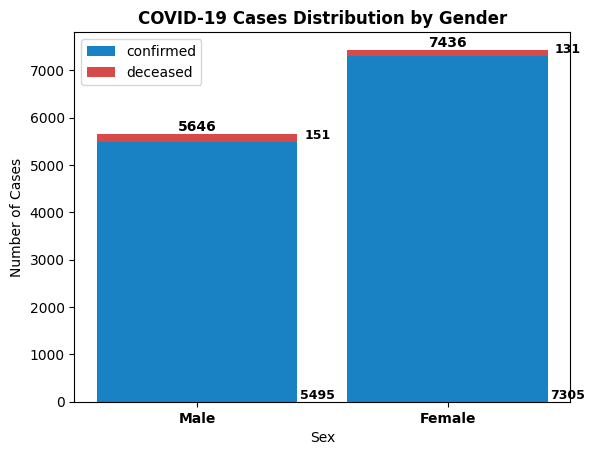

In [104]:
fig, ax = plt.subplots()

bottom = np.zeros(len(c_by_gender))
colors = ['#1982c4', '#d74a49']

for i, col in enumerate(c_by_gender.columns):
    ax.bar(
        c_by_gender.index,
        c_by_gender[col],
        bottom=bottom,
        label=col,
        color=colors[i]
    )
    bottom += np.array(c_by_gender[col])

totals = c_by_gender.sum(axis=1)
y_offset = 70

for i, total in enumerate(totals):
    ax.text(
        totals.index[i],
        total + y_offset,
        round(total),
        ha='center',
        weight='bold'
    )

y_offset = 70

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() * 1.1,
        bar.get_y() + y_offset,
        round(bar.get_height()),
        ha='center',
        color='black',
        weight='bold',
        size=9
    )

plt.xlabel('Sex')
plt.ylabel('Number of Cases')
ax.set_xticks(list(range(0, 2)))
ax.set_xticklabels(['Male', 'Female'], fontweight="bold")
ax.set_title("COVID-19 Cases Distribution by Gender", fontweight="bold")
ax.legend();

During the first COVID-19 outbreak in South Korea, there was a 25% higher incidence of the disease among women compared to men. The proportion of deceased patients in both subgroups remained low at below 3% per group.

In [105]:
c_by_age = (
    t_age.groupby('age').tail(1)
    .drop('date', axis=1)
    .set_index('age')
    .assign(total=lambda x: x.sum(axis=1))
)

In [106]:
per = c_by_age.iloc[:, :-1].div(c_by_age['total'], axis=0).mul(100).round(2)

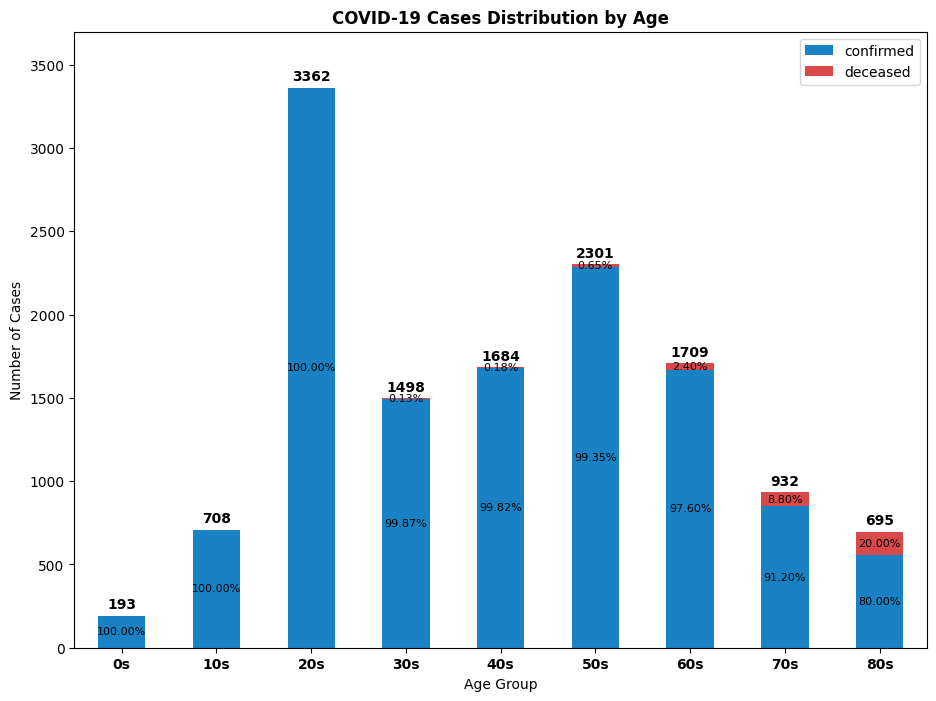

In [107]:
ax = c_by_age.iloc[:, :-1].plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(11, 8),
    rot=0
    )

for c in ax.containers:
    label = c.get_label()
    labels = [f'{val:.2f}%' if val != 0 else '' for val in per[label]]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

for i, age_group in enumerate(ax.patches[:len(ax.patches)//2]):
    bar_height = sum(c.patches[i].get_height() for c in ax.containers)
    total = c_by_age['total'].iloc[i]
    ax.text(
        age_group.get_x() + age_group.get_width() / 2,
        bar_height + 25,
        f'{total:.0f}', 
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
        )


plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
ax.set_ylim(0, max(c_by_age['total']) * 1.1)
ax.set_xticklabels(labels=c_by_age.index, fontweight="bold")
ax.set_title("COVID-19 Cases Distribution by Age", fontweight="bold")
ax.legend();

Based on the age distribution of cases, the age groups with the highest incidence were the '20s' and '50s'. People in their 20s made up 3362 cases, or roughly 26% of all cases, while people in their 50s made up 2301 cases, or 18% of all cases.

Percentage mortality rates are shown above each pair of columns, giving an immediate idea of the severity of cases in different age groups. Starting at age 60, the mortality rate from COVID infection increases until it reaches 20% in the 80s. This pattern suggests that older people are more likely to develop critical condition with this diagnosis. 

In [108]:
age_order = [
        '0s', '10s', '20s', '30s', '40s', '50s',
        '60s', '70s', '80s', '90s', '100s'
]

p_info['age'] = pd.Categorical(
        p_info['age'],
        categories=age_order,
        ordered=True
)

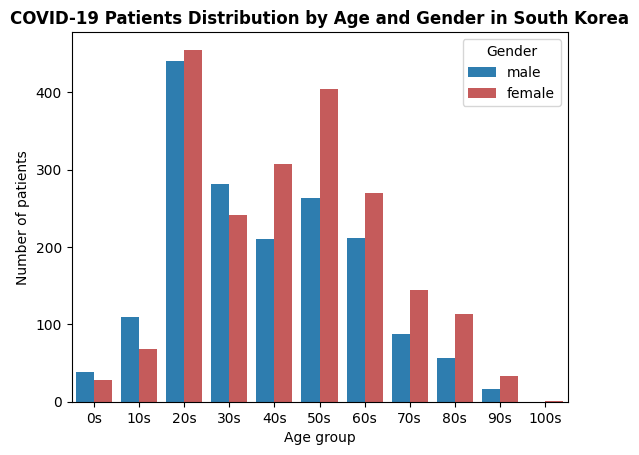

In [109]:
palette_rb = {'male': '#1982c4', 'female': '#d74a49'}

sns.countplot(p_info, x='age', hue='sex', palette=palette_rb)

plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.title(
    'COVID-19 Patients Distribution by Age and Gender in South Korea',
    weight='bold'
    )
plt.legend(title="Gender");

In breif, when looking at the distribution of patients by age group and gender, the same trends emerge. It can be seen that the majority of patients are in their 20s and 50s, with a higher proportion of women in most subgroups. 

In [110]:
c_by_province = (
    case.replace('Sejong', 'Sejongsi')
    .groupby('province')
    .agg(confirmed=('confirmed', 'sum'))
    .sort_values(by='confirmed', ascending=False)
)

In [111]:
fig = px.choropleth_mapbox(
    data_frame=c_by_province,
    geojson=province_geo,
    featureidkey='properties.name_eng',
    locations=c_by_province.index,
    color='confirmed',
    color_continuous_scale="turbo",
    opacity=0.8,
    zoom=5.5,
    center = {"lat": 35.86, "lon": 127.09},
    mapbox_style="carto-positron",
    title="Distribution of COVID-19 cases in South Korea by province",
    width=1000,
    height=600
)

fig.update_layout(
    title_text="Distribution of COVID-19 cases in South Korea by province",
    title_font=dict(size=17, family="Arial Black, sans-serif"),
    margin={'l': 20, 'r': 20, 't': 40, 'b': 20},
    coloraxis_colorbar={'title': "Number of<br>confirmed cases"}
)

**Daegu** province had 6680 confirmed COVID-19 cases which is approximately 5 times more than the second, the third and the fourth provinces in terms of accumulated cases - **Gyeongsangbuk-do** (1324 cases), **Seoul** (1280 cases) and **Gyeonggi-do** (1000 cases). Other provinces had significantly lower numbers of cases, with none exceeding 1000 per region. These provinces are among the most densely populated ares in South Korea, creating favourable conditions for virus spread.

In [112]:
t_by_province = (t_province.groupby('province').tail(1)
                 .drop('date', axis=1)
                 .set_index('province')
                 .sort_values('confirmed', ascending=False))

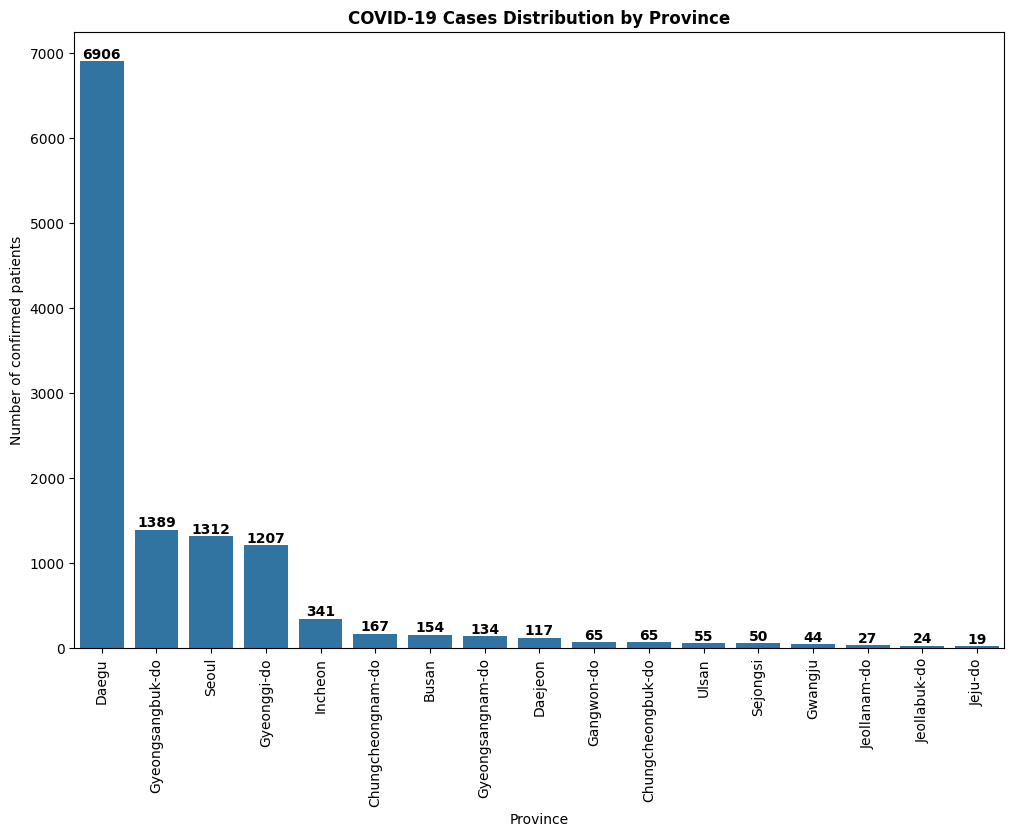

In [113]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=t_by_province.index, y=t_by_province['confirmed'], ax=ax)

plt.xlabel('Province')
plt.ylabel('Number of confirmed patients')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold')
ax.set_xticks(list(range(0, 17)))
ax.set_xticklabels(labels=c_by_province.index, rotation = 'vertical')
ax.set_title(
    "COVID-19 Cases Distribution by Province",
    fontweight='bold'
);

**TimeProvince** data corespond to the trends observed from **Case** data file. Daegu, Gyeongsangbuk-do, Seoul and Gyeonggi-do remain the most saturated regions in South Korea in terms of confirmed cases. This bar chart once again highlights the difference between Daegu and the other case-leading provinces. 

## **4. 3. The Causes and Progression of South Korea's COVID-19 Epidemic**
<hr>

### **4. 3. 1. Infection Cases**

In [114]:
c_by_infcase = (
    case.fillna('unknown')
    .groupby('infection_case')
    .agg(confirmed=('confirmed', 'sum'))
    .sort_values(by='confirmed', ascending=False)
)

In [115]:
main_infcases = c_by_infcase[c_by_infcase['confirmed'] > 50]

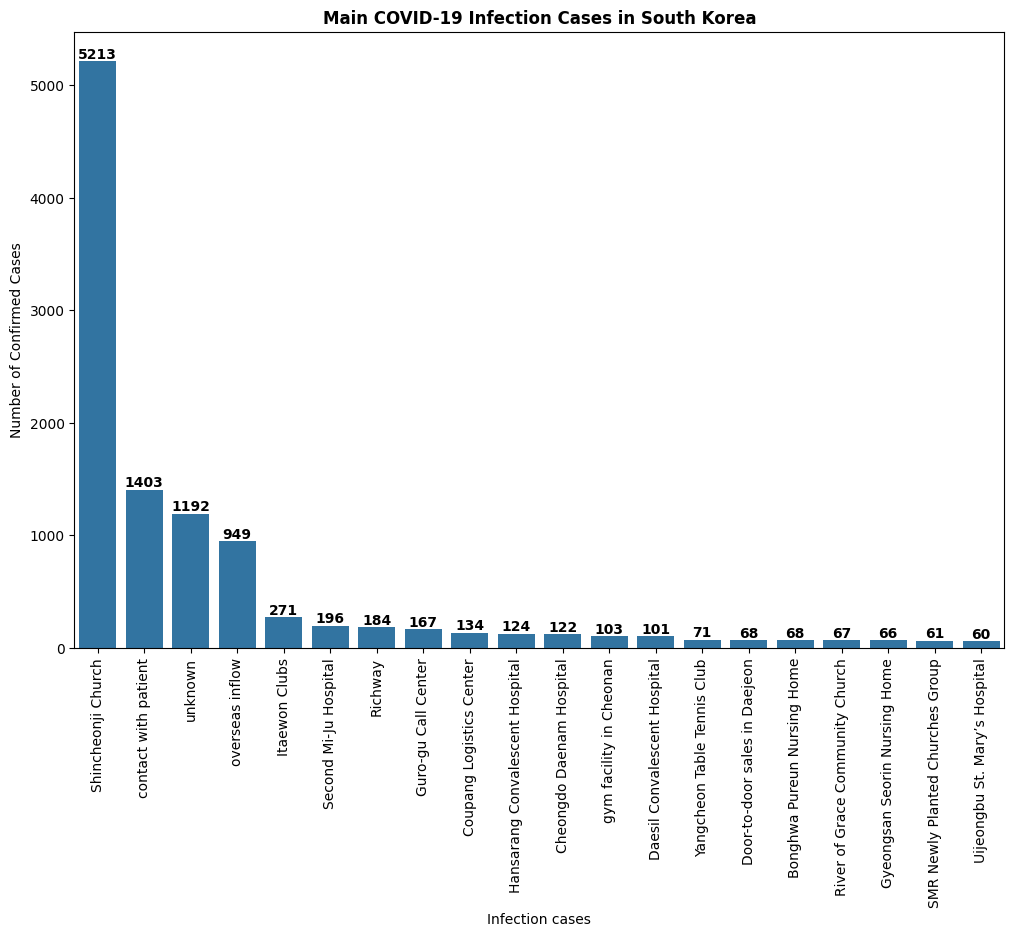

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=main_infcases.index, y=main_infcases['confirmed'], ax=ax)
ax.bar_label(ax.containers[0], label_type='edge', fontweight="bold")
ax.set_xticks(list(range(0, 20)))
ax.set_xticklabels(labels=main_infcases.index, rotation = 'vertical')
ax.set_title(
    "Main COVID-19 Infection Cases in South Korea",
    fontweight="bold"
)
plt.xlabel('Infection cases')
plt.ylabel('Number of Confirmed Cases');

The graph above demonstrates the main COVID-19 cases in South Korea. It is evident that a significant part of cases does not represent group infections - `contact with patient` and `overseas inflow` generated above 2 thousand confirmed cases. Many group cases of infection are linked to religious events, hospitals and recreational activities. It is important to note that the number of confirmed cases associated with the Shincheonji church is 5213, nearly four times higher than the second most common cause of infection.  Shincheonji church became a significant contributor to the spread of COVID-19 in South Korea.

Infection cases have been classified into broader categories to enable the observation of more widespread trends.

In [117]:
infcases_groups = {
    'religious events': [
        'church', 'churches', 'piligrimage', 'pastors', 'christ', 'temple',
        'biblical'
    ],
    'social': [
        'clubs', 'karaoke', 'orange town', 'gathering', 'community', 'culture'
    ],
    'medical institutions': [
        'hospital', 'nursing', 'silver town','laboratory', 'medical'
    ],
    'retail': ['richway', 'sales'],
    'workplace': [
        'engineer', 'call center', 'logistics', 'manufacture', 'ministry',
        'dunsan electronics town', 'insurance', 'wings tower', 'city hall', 
        'company', 'orange life'
    ],
    'sports events': ['gym', 'tennis'],
    'childcare institutions': ['care', 'kindergarten'],
    'education': ['learning', 'academy'],
    'residences': ['apt', 'apartments', 'family', 'daezayeon', 'collective'],
    'contact with patient': ['contact with patient'],
    'overseas inflow': ['overseas inflow'],
    'unknown': ['unknown']
}

In [118]:
def groupping_by_keywords(x: str) -> str:

    for key, values in infcases_groups.items():
        for item in values:
            if item in x.lower():
                return key

c_by_infcase['case_group'] = (
   c_by_infcase.index
   .to_series()
   .apply(groupping_by_keywords) 
)

In [119]:
gen_cases = (
    c_by_infcase
    .groupby('case_group')
    .sum('confirmed')
    .sort_values('confirmed', ascending=False)
)

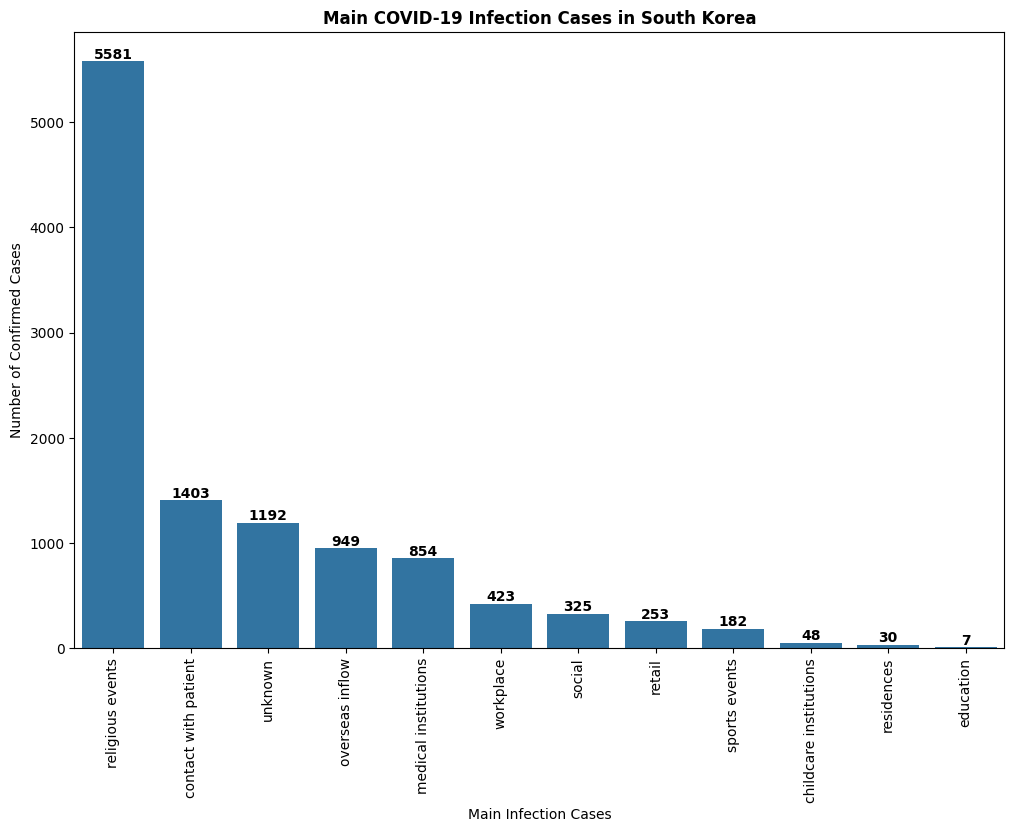

In [120]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=gen_cases.index, y=gen_cases['confirmed'], ax=ax)

ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold')
ax.set_xticks(list(range(0, 12)))
ax.set_xticklabels(labels=gen_cases.index, rotation = 'vertical')
ax.set_title(
    "Main COVID-19 Infection Cases in South Korea",
    fontweight='bold'
)
plt.xlabel('Main Infection Cases')
plt.ylabel('Number of Confirmed Cases');

Distribution above suggests that at the time the data was collected, religious events were the leading scource of COVID-19 infections in South Korea. Mass gatherings related with Shincheonji Church in the city of Daegu made a significant contribution of 5213 confirmed cases to arising number. This event will be discussed more further in the analysis.

A significant number of cases also arising from direct contact with patients and from overseas inflow which are both in this data classified as not a group infection cases. Cases coming from medical institutions also make up a notable effect on the epidemic. This figure is significant as it indicates transmission within healthcare settings, which are typically high-risk environments due to the concentration of ill patients and the inherent challenges in infection control.

The relatively low number of cases from work and retail environments, educational institutions, residences, and childcare institutions could indicate effective control measures in these environments or less reporting from these sources.

### **4. 3. 2. Accumulation of COVID-19 Cases during the First Outbreak in South Korea**

In [121]:
p_info.loc[
    [p_info['confirmed_date'].idxmin(), p_info['confirmed_date'].idxmax()]
]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1644,1400000001,female,30s,China,Incheon,NaN,overseas inflow,NaN,<NA>,2020-01-19,2020-01-20,2020-02-06,NaT,released
1985,1400000342,female,NaN,Korea,Incheon,NaN,overseas inflow,NaN,<NA>,NaT,2020-06-30,NaT,NaT,isolated


The first ever case of COVID-19 in South Korea was recorded in **20 January 2020** in the Incheon province. This entry belongs to a woman from China. As this is the first reported case, it is likely that the COVID-19 infection entered South Korea from abroad, possibly from China.

The last patient in the first wave of the disease was recorded on **30 June 2020**. As can be observed, the initial COVID-19 outbreak in S. Korea lasted for more than five months.

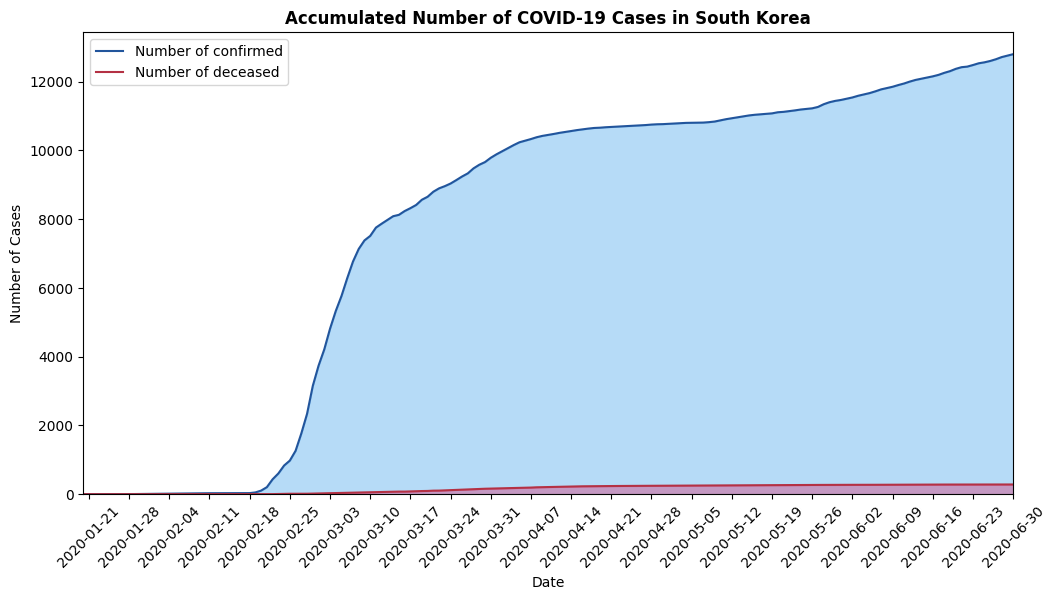

In [122]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    y=time['confirmed'],
    x=time['date'],
    color='#22559C',
    label='Number of confirmed'
)

ax.fill_between(time['date'], time['confirmed'], color='#0d88e6', alpha=0.3)

sns.lineplot(
    y=time['deceased'],
    x=time['date'],
    color='#B43144',
    label='Number of deceased'
)

ax.fill_between(time['date'], time['deceased'], color='#e60049', alpha=0.3)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_ylim(ymin=0)
ax.set_xlim(
        xmin=pd.to_datetime('2020-01-20'),
        xmax=pd.to_datetime('2020-06-30')
)


plt.title('Accumulated Number of COVID-19 Cases in South Korea', weight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45);

The graph demonstrates an exponential increase in COVID-19 cases in South Korea from late February to early March 2020, with the situation starting to stabilise in mid-March. It is significant to note that during the entire period, the percentage of deceased patients was not high. Given the relatively rapid stabilisation of the situation and the low number of deaths, it can be assumed that the medical system in South Korea managed the situation promptly, including the critical cases of infection. 

The following analysis explores the variation in the number of cases reported daily in an effort to provide more insight into the spred of the infection in South Korea and identify potential contributing events.

In [123]:
time['daily_confirmed'] = time['confirmed'].diff()
time['daily_deceased'] = time['deceased'].diff()

time['daily_confirmed'].fillna(0, inplace=True)
time['daily_deceased'].fillna(0, inplace=True)

In [124]:
main_infcases = (
    main_infcases.drop(
        [
            'contact with patient', 'unknown',
            'overseas inflow', 'Second Mi-Ju Hospital'
        ]
    )
    ['confirmed'].nlargest(5)
)

In [125]:
event_dates = (
    p_info[p_info['infection_case'].isin(main_infcases.index.tolist())]
    .groupby('infection_case')['confirmed_date']
    .min()
)

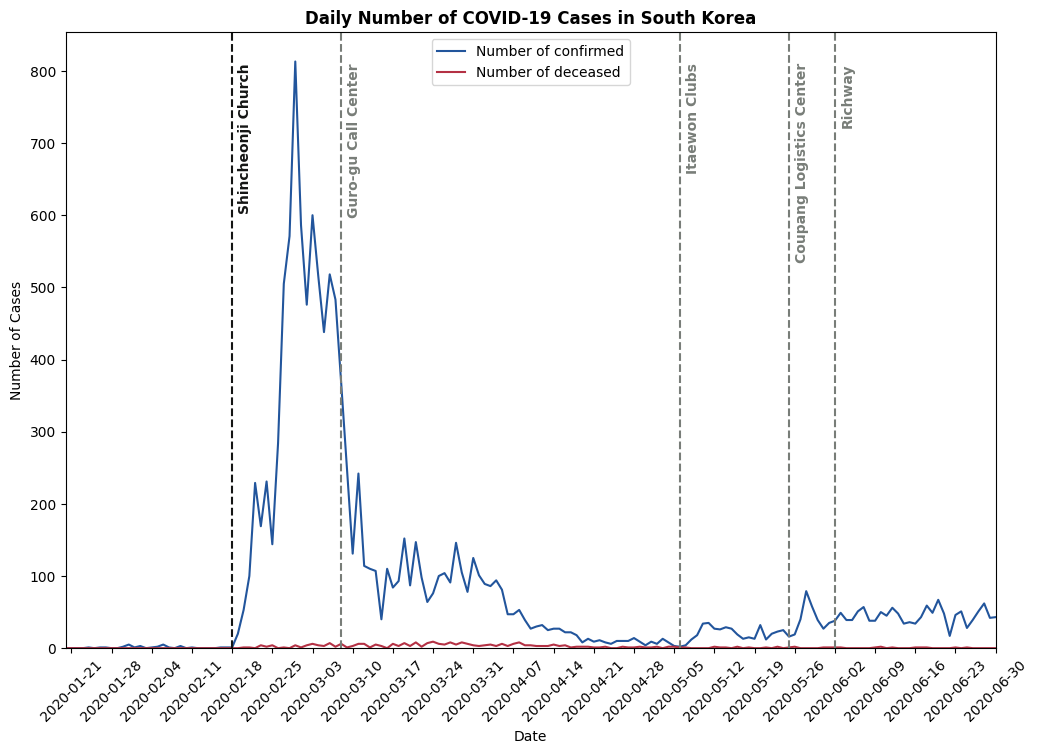

In [126]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(
    y=time['daily_confirmed'],
    x=time['date'],
    color='#22559C',
    label='Number of confirmed'
)

sns.lineplot(
    y=time['daily_deceased'],
    x=time['date'],
    color='#B43144',
    label='Number of deceased'
)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_ylim(ymin=0)
ax.set_xlim(
    xmin=pd.to_datetime('2020-01-20'),
    xmax=pd.to_datetime('2020-06-30')
)

colors = ['#787D78', '#787D78', '#787D78', '#787D78', '#141514']

for (infection_case, date), color in zip(event_dates.items(), colors):
    plt.axvline(date, color=color, linestyle='--')
    plt.text(
        date + pd.Timedelta(days=1),
        ax.get_ylim()[1] - (ax.get_ylim()[1] * 0.05),
        infection_case,
        rotation=90,
        verticalalignment='top',
        color=color,
        weight='bold'
    )

plt.title('Daily Number of COVID-19 Cases in South Korea', weight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45);

The line chart indicates a notable peak coinciding with the date of the first infection case originating from mass gatherings of Shincheonji Church in late February. As it was mentioned before, this religious organization is responsible for more than 5000 cases and it is believed to be a reason for the initial COVID-19 outbreak. Other events pinpointed in the analysis as major sources of infection did not exert as substantial an influence on the trajectory of the epidemic.

### **4. 3. 3. Relationship between COVID-19 Incidence and other Factors in South Korean Regions**

In [127]:
aggregation = {
    col: 'sum' if 'count' in col else 'mean'
    for col in region.columns if col not in ['province', 'city']
}

r_by_province = (
    region.groupby('province')
    .agg(aggregation)
    .round(2)
    .drop(['code', 'latitude', 'longitude'], axis=1)
    .rename(columns=lambda x: 'avg_' + x if 'ratio' in x else x)
)

In [128]:
korea_totals = (
    pd.DataFrame(
        c_by_province.sum().tolist(),
        index=c_by_province.columns
    )  
    .transpose()
)

korea_totals.index = ['Korea']

c_by_province = pd.concat([c_by_province, korea_totals])

In [129]:
province_features = c_by_province.join(r_by_province)

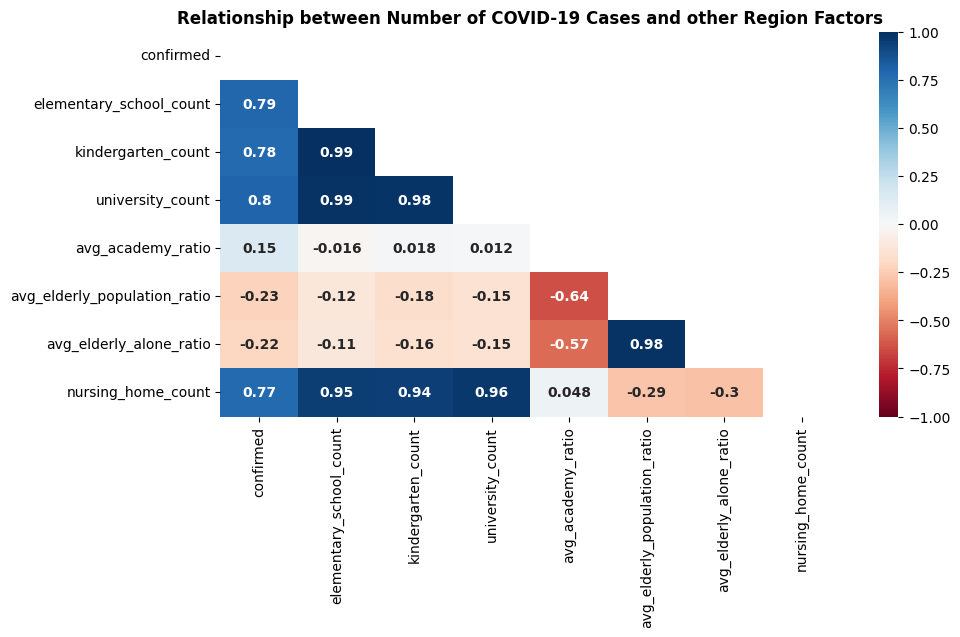

In [130]:
plt.figure(figsize=(10, 5))
sns.heatmap(province_features.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True,
            mask=np.triu(province_features.corr()),
            annot_kws={'fontweight': 'bold'})
plt.title(
    "Relationship between Number of COVID-19 Cases and other Region Factors",
    weight='bold'
);

To try to investigate the factors contributed to the spread of COVID-19 in South Korea, the relationship between the number of confirmed cases in the region and other factors was tested. 

Upon analyzing the data at the provincial level, a strong positive correlation emerges between the number of confirmed cases and the presence of educational institutions like elementary schools, kindergartens, and universities. However, these institutions are not the direct cause of higher infection rates. Their role as common gathering places might suggest a contributory influence, but this is likely overshadowed by the fact that regions with a higher concentration of such institutions generally have larger populations. This larger population density is a more plausible explanation for the elevated case numbers observed in these areas.

*To ascertain direct correlation and causality, the data would need to be normalised by the population size of the area, or additional factors would need to be included in the analysis.*

### **4. 3. 4. Relationship between COVID-19 Incidence and Floating Population in Seoul Province**

In [131]:
f_by_age_sex = (
    floating.groupby(['age', 'sex'])
    .mean('fp_num')
    .round()
    .reset_index()
)
f_by_age_sex

,age,sex,fp_num
0,20s,female,734840.0
1,20s,male,706688.0
2,30s,female,793953.0
3,30s,male,813734.0
4,40s,female,801071.0
5,40s,male,802823.0
6,50s,female,778045.0
7,50s,male,725462.0
8,60s,female,520784.0
9,60s,male,460971.0


In [132]:
p_seoul = p_info[p_info['province'] == 'Seoul']
p_seoul = p_seoul[~p_seoul['age'].isin(['0s', '10s', '80s', '90s', '100s'])]

In [133]:
age_order = ['20s', '30s', '40s', '50s', '60s', '70s']

p_seoul['age'] = pd.Categorical(
        p_seoul['age'],
        categories=age_order,
        ordered=True
)

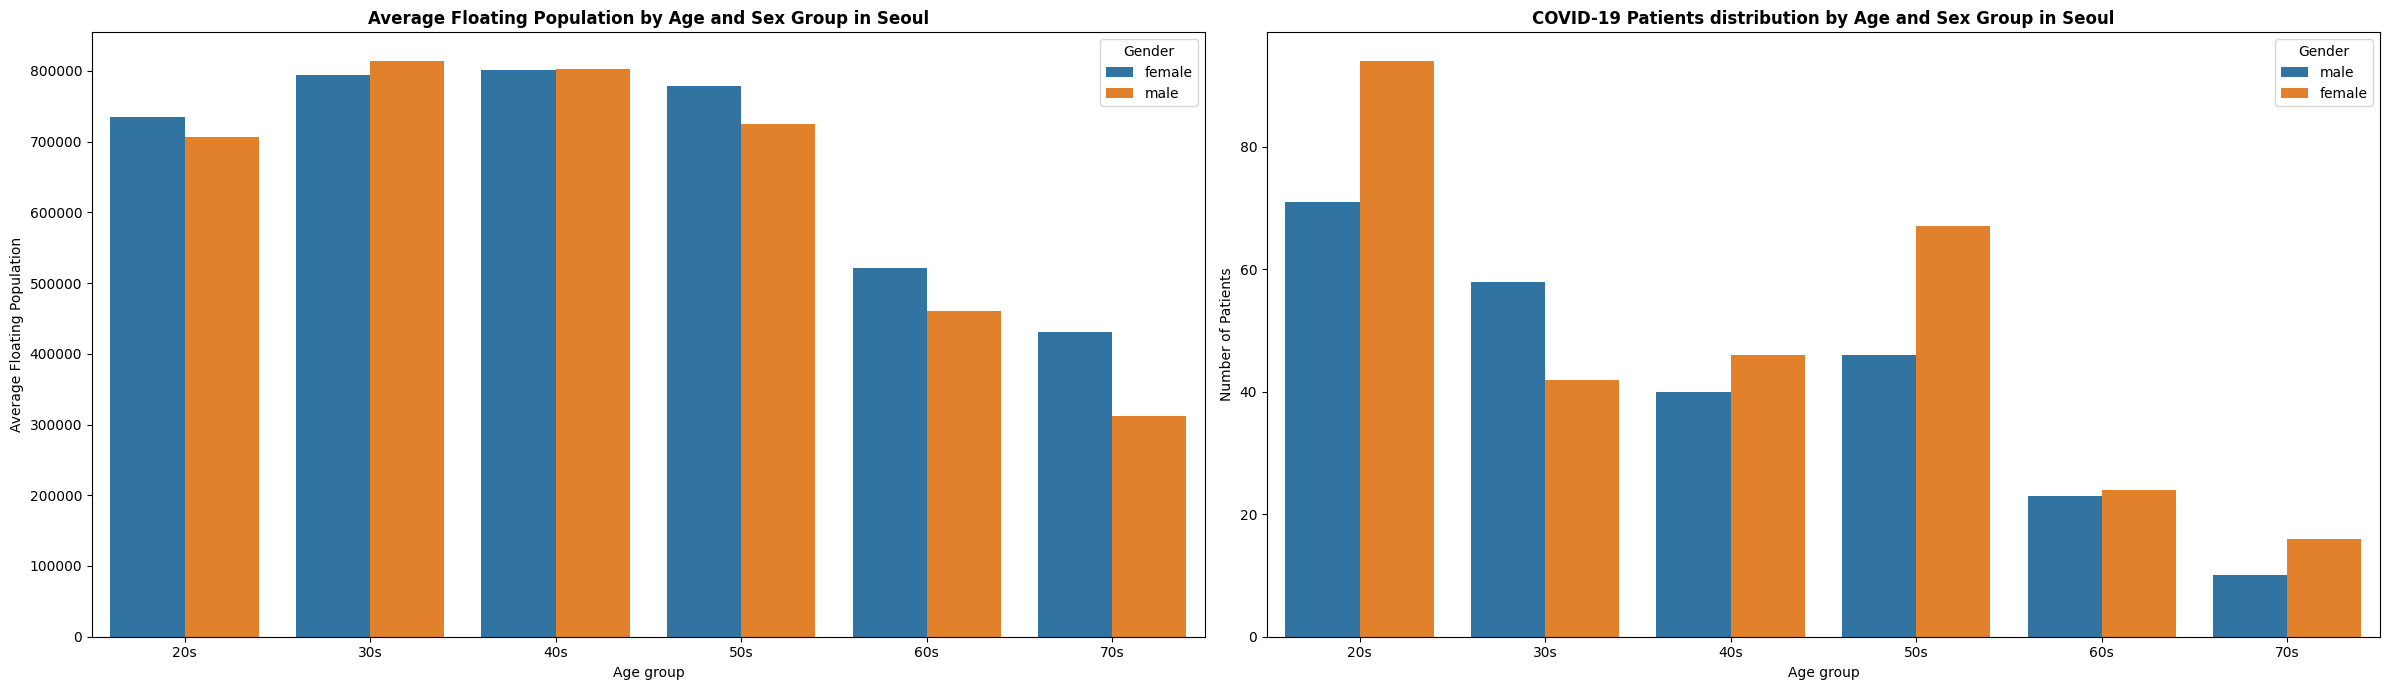

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(24, 7))

sns.barplot(data=f_by_age_sex, x='age', y='fp_num', hue='sex', ax=axes[0])
axes[0].set_xlabel('Age group')
axes[0].set_ylabel('Average Floating Population')
axes[0].set_title(
    'Average Floating Population by Age and Sex Group in Seoul',
    weight='bold'
)
axes[0].legend(title="Gender")

sns.countplot(data=p_seoul, x='age', hue='sex', ax=axes[1])
axes[1].set_xlabel('Age group')
axes[1].set_ylabel('Number of Patients')
axes[1].set_title(
    'COVID-19 Patients distribution by Age and Sex Group in Seoul',
    weight='bold'
)
axes[1].legend(title="Gender")

plt.tight_layout()
plt.show()

Distribution of floating population and number of confirmed cases by age and sex group in the provice of Seoul are not the same. Nevertheless, there is a pattern in older age subgroups, with a decrease in both COVID-19 and the floating population numbers. It appears reasonable that elderly individuals travel less, interact with fewer people, and are thus less prone to contract the analysed or any other infection.

Differences in the younger age groups could be due to a variety of reasons, as the spread of COVID-19 infection is not only influenced by the floating population, but also by other factors such as a person's type profession, preferred means of transport etc. 

### **4. 3. 5. Relationship between the Spread of COVID-19 Infection and Weather Conditions**

In [135]:
weather = pd.merge(
    weather,
    t_province[['date', 'province', 'confirmed']],
    on=['province', 'date'],
    how='inner'
)

In [136]:
weather = weather.select_dtypes(include=[np.number])

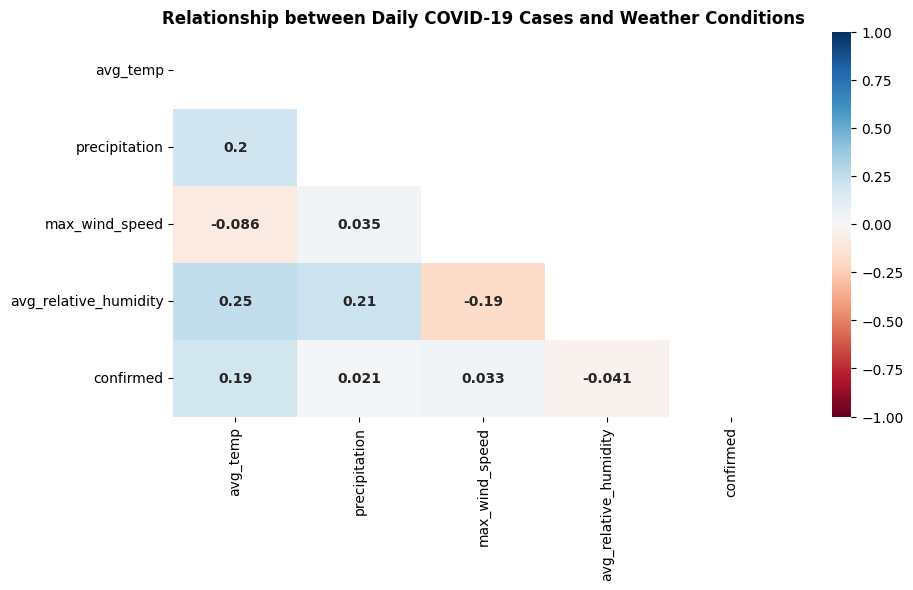

In [137]:
plt.figure(figsize=(10, 5))
sns.heatmap(weather.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True,
            mask=np.triu(weather.corr()),
            annot_kws={'fontweight': 'bold'})
plt.title(
    "Relationship between Daily COVID-19 Cases and Weather Conditions",
    weight='bold'
);

Temperature, precipitation, wind speed, humidity and other meteorological factors may affect the transmission of different voiruses both directly and indirectly by altering human behaviour. However, evaluation of data gathered from South Korea during the first COVID-19 outbreak showed no appreciably strong correlation between the number of daily confirmed cases and meteorological conditions.

## **4. 4. COVID-19 Infection Control Strategy in South Korea**
<hr>

Since the South Korean government handeled the initial COVID-19 outbreak relatively quickly and efficiently, one of the most beneficial aspects of this investigation would be examining the infection control approach, specifically - the information in the Policy data file.

**Infectious Disease Alert** system is a Korea Centers for Disease Control & Prevention (KCDC) method to indicate the severity of the outbreak and the response measures to be taken by the Korean government and the public.

In [138]:
policy[policy['type'] == 'Alert']

,type,gov_policy,detail,start_date,end_date
policy_id,,,,,
1,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
2,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
3,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaT


The **Level 1 (Blue)** infectious disease alert was issued more than two weeks before the first case of COVID-19 was detected in the country.

In [139]:
alert = policy[policy['type'] == 'Alert'][['start_date', 'detail']][1:]
alert = alert.set_index('detail')['start_date']

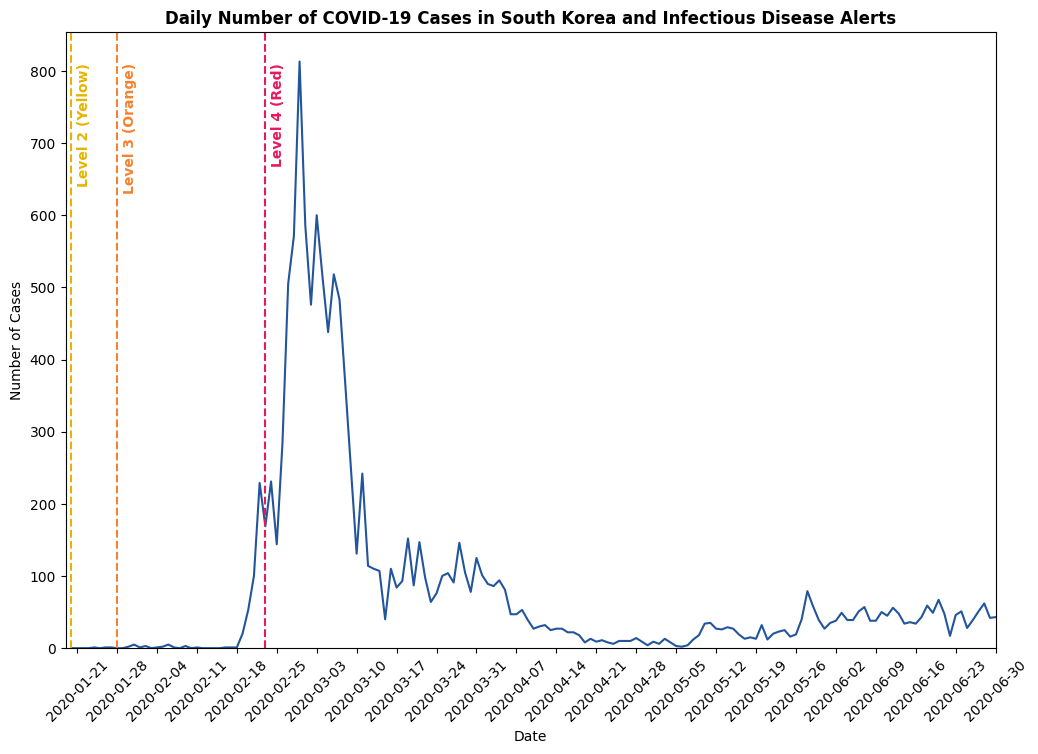

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(
    y=time['daily_confirmed'],
    x=time['date'],
    color='#22559C'
)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_ylim(ymin=0)
ax.set_xlim(
    xmin=pd.to_datetime('2020-01-19'),
    xmax=pd.to_datetime('2020-06-30')
)

colors = ['#e6b400', '#f58231', '#e6195B']

for (detail, date), color in zip(alert.items(), colors):
    plt.axvline(date, color=color, linestyle='--')
    plt.text(
        date + pd.Timedelta(days=1),
        ax.get_ylim()[1] - (ax.get_ylim()[1] * 0.05),
        detail,
        rotation=90,
        verticalalignment='top',
        color=color,
        weight='bold'
    )

plt.title(
    'Daily Number of COVID-19 Cases in South Korea and '
    'Infectious Disease Alerts',
    weight='bold'
)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45);

In [141]:
time[time['date'] == '2020-01-28']

,date,test,negative,confirmed,released,deceased,daily_confirmed,daily_deceased
8,2020-01-28,116,97,4,0,0,0.0,0.0


In [142]:
time[time['date'] == '2020-02-23']

,date,test,negative,confirmed,released,deceased,daily_confirmed,daily_deceased
34,2020-02-23,26179,17520,602,18,6,169.0,4.0


- With the first officially recorded case of COVID-19 in South Korea on 20 January 2020 , a **Level 2 (yellow)** alert has been issued.
- The **Level 3 (orange)** was announced just over a week later. At that time, testing of people in the country had started (over 100 tests), but the total number of confirmed cases was only 4 persons.
- The highest **Level 4 (red)** ALERT was issued on 23 February. At that time, the rate of incidence was at the beginning of an exponential growth phase and the total number of cases in the country was around 600.

The South Korean authorities started controlling the infection before it started. The first restrictions and warnings came out when the situation did not seem serious at all. These seemingly excessive precautions have become one of the keys to the successful control of the infection in the country. 

In [143]:
policy['type'].unique()

array(['Alert', 'Immigration', 'Health', 'Social', 'Education',
       'Technology', 'Administrative', 'Transformation'], dtype=object)

In addition to the KCDC Infectious Disease Alert system, other policies have been introduced in the country. These included special immigration procedures for newcomers from different countries, social distancing campaigns, a shift to online class learning, compulsory wearing of masks, closure of social gathering spaces, etc.

# **5. Conclusion**
<hr>

The exploratory analysis (EDA) of the initial COVID-19 outbreak in South Korea has provided valuable insights into the dynamics the epidemic in the country. Key findings include:
- **Gender and Age Disparities:**  Women showed a 25% higher COVID-19 incidence than men. Highest cases were in the '20s' and '50s' age groups, with mortality rates increasing in those aged 60 and above.
- **Geographic Distribution:** A disproportionate number of cases were concentrated in Daegu province, with notable cases in Gyeongsangbuk-do, Seoul, and Gyeonggi-do. This pattern highlights the impact of population density on virus spread
- **Sources of Infection:** Major infection sources were religious events (notably Shincheonji Church), direct contact with patients, and overseas inflow. Mass gatherings at Shincheonji Church were one of the primary contributor to the initial outbreak.
- **Infection Trends and Response:** A rapid increase in cases was observed in late February, stabilizing by mid-March. This indicates effective control measures and medical response, particularly in workplaces, educational, and residential areas.
- **Correlation with Socio-Demographic Factors:** A positive correlation was noted between confirmed cases and the presence of educational institutions, likely due to higher population density in these areas. Additionally, the analysis of the floating population in Seoul revealed a lower traveling and infection rate among older age groups, suggesting lesser travel and social interaction could have played a role in reducing their infection rates.

Overall, the South Korean government and other authorities have dealt with the epidemic quickly and efficiently, making it a good example of how to prepare for an epidemic.

How to prepare for the next outbreak of infection in the homeland:
- **Prepare early.** Proactive precautionary measures have been one of the key factors in the successful control of the epidemiological situation in South Korea. It is worth monitoring the situation in neighbouring countries and introducing restrictions before the infection starts to spread in own country. 
- **Reduce contacts between individuals.** This includes everything to do with social gatherings. Implement social distancing policies, remote working and education. 
- **Ensure safety.** In a crisis like this, it is important not only to supply the market with basic protective equipment such as masks, but also to ensure that hospitals work efficiently by providing all the necessary materials and medicines.
- **Immigration policies or lockdown.** During an epidemic, one of the biggest sources of infection is overseas inflow. For this reason, it is very important to test people comming form abroad, apply isolation or to restrict arrival from other countries.

# **6. Suggestions for Improvement**
<hr>

- Normalize data by population of provinces when analyzing regional data.
- A more detailed analysis of released policies. Compare which measures have been most effective, estimate their duration.
- Analyse search trends and describe how public interest and perception have changed.